# Titanic Survial 
Using classification models on Kaggle competition dataset. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
test_path = 'D:/Datasets/Titanic/test.csv'
train_path = 'D:/Datasets/Titanic/train.csv'

## <u>Explore</u>

In [3]:
train_data = pd.read_csv(train_path)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data = train_data.round()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.693277,0.523008,0.381594,32.214366
std,257.353842,0.486592,0.836071,14.524527,1.102743,0.806057,49.693352
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x147EB470>,
      dtype=object)

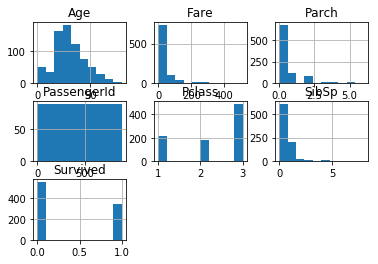

In [9]:
train_data.hist()

In [10]:
# Embarked Sex Age 
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
# Pclass 
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### <u>Explore:</u>
* 687 values missing for Cabin 
* 177 values missing for Age 
* Average age is about 30
* Pclass 3 is the largest for classes 
* Average Fare price is 32.20

### <u>Next I'll explore the missing Cabins:</u>
* What are the features of the missing Cabins? 
* Is there a Fare for the missing Cabins?
* Is it possible to fill the missing Cabins with a value; if so what is the best approach/value?

In [13]:
missing_cabins = train_data[train_data['Cabin'].isnull()]
missing_cabins.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.0,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.0,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.0,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,8.0,NaN,S


In [14]:
missing_cabins['Pclass'].mode()

0    3
dtype: int64

In [15]:
missing_cabins['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [16]:
# What are Pclass 3 cabin values? 

cabin_passengers = train_data[train_data['Cabin'].notnull()]
cabin_passengers[cabin_passengers['Pclass']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,17.0,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,8.0,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.0,F E69,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.0,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.0,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,17.0,G6,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0,E10,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,8.0,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,8.0,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.0,E121,S


## <u>Remove number from Cabin and just show the letter only</u> 
* Use SimpleImputer to fill the missing values in the Cabin column with the most_frequent
* This will create a new column so the original Cabin column will need to be dropped 
* Next, apply a function that will remove the number from the cabin leaving only the letter
* This should help with encoding 

In [17]:
# Fill in cabins with most frequent cabin 
from sklearn.impute import SimpleImputer

cab_imputer = SimpleImputer(strategy='most_frequent')

train_data['Cabins'] = cab_imputer.fit_transform(train_data[['Cabin']]).ravel()

In [18]:
# Split up the X and y for training 

X_train_0 = train_data.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1) 
y_train = train_data['Survived']

In [19]:
X_train_0.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabins
0,3,male,22.0,1,0,7.0,S,B96 B98
1,1,female,38.0,1,0,71.0,C,C85
2,3,female,26.0,0,0,8.0,S,B96 B98
3,1,female,35.0,1,0,53.0,S,C123
4,3,male,35.0,0,0,8.0,S,B96 B98


In [20]:
# list(X_train_0['Cabins'].sort_values().unique())

# A, B, C, D, E, F, G, T 

In [21]:
def cab_letter(cabin):
    """Remove the numbers from the cabin leaving only the letter """
    list_a = [i for i in cabin['Cabins'] if i.startswith('A')]
    list_b = [i for i in cabin['Cabins'] if i.startswith('B')]
    list_c = [i for i in cabin['Cabins'] if i.startswith('C')]
    list_d = [i for i in cabin['Cabins'] if i.startswith('D')]
    list_e = [i for i in cabin['Cabins'] if i.startswith('E')]
    list_f = [i for i in cabin['Cabins'] if i.startswith('F')]
    list_g = [i for i in cabin['Cabins'] if i.startswith('G')]
    list_t = [i for i in cabin['Cabins'] if i.startswith('T')]

    cabin['Cabin_Section'] = cabin['Cabins'].replace(list_a, 'A').replace(list_b, 'B').replace(list_c, 'C').replace(list_d, 'D').replace(list_e, 'E').replace(list_f, 'F').replace(list_g, 'G').replace(list_t, 'T')
    return cabin

In [22]:
X = cab_letter(X_train_0)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabins,Cabin_Section
0,3,male,22.0,1,0,7.0,S,B96 B98,B
1,1,female,38.0,1,0,71.0,C,C85,C
2,3,female,26.0,0,0,8.0,S,B96 B98,B
3,1,female,35.0,1,0,53.0,S,C123,C
4,3,male,35.0,0,0,8.0,S,B96 B98,B


In [23]:
X_train = X.drop(['Cabins'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Section
0,3,male,22.0,1,0,7.0,S,B
1,1,female,38.0,1,0,71.0,C,C
2,3,female,26.0,0,0,8.0,S,B
3,1,female,35.0,1,0,53.0,S,C
4,3,male,35.0,0,0,8.0,S,B


In [24]:
X_train.isnull().sum()

Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Cabin_Section      0
dtype: int64

## <u>Fill in missing values</u> 

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = list(['Embarked','Sex'])

num_pipeline = Pipeline([
    ("fill_age", SimpleImputer(strategy='mean')),
])

cat_pipeline = Pipeline([
    ("fill_category", SimpleImputer(strategy='most_frequent')),
    ("encode_str", OneHotEncoder(sparse=False)),
])

full_pipeline = ColumnTransformer([
    ("age_col", num_pipeline, ['Age']),
    ("cat_cols", cat_pipeline, cat_attribs)
])

In [26]:
X_train_tr = full_pipeline.fit_transform(X_train)

# SVC model 

In [27]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train_tr, y_train)

SVC(gamma='auto')

# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_tr, y_train)

RandomForestClassifier(random_state=42)

# <u>Testing</u> 

In [29]:
test_data = pd.read_csv(test_path)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Try to make a pipeline for the preprocessing 
* Fill Cabin with most frequent 
* Drop the original Cabin column
* Remove the number from the new Cabin column 


In [31]:
test_data['Cabins'] = cab_imputer.transform(test_data[['Cabin']]).ravel()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabins
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,B96 B98
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,B96 B98
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,B96 B98
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,B96 B98
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,B96 B98


In [32]:
test_data_0 = cab_letter(test_data)

In [33]:
test_data_0.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabins,Cabin_Section
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,B96 B98,B
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,B96 B98,B
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,B96 B98,B
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,B96 B98,B
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,B96 B98,B


In [34]:
test_data_0 = test_data_0.round()

In [35]:
test_data_1 = test_data_0.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Cabins'], axis=1)
test_data_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Section
0,3,male,34.0,0,0,8.0,Q,B
1,3,female,47.0,1,0,7.0,S,B
2,2,male,62.0,0,0,10.0,Q,B
3,3,male,27.0,0,0,9.0,S,B
4,3,female,22.0,1,1,12.0,S,B


In [36]:
X_test = full_pipeline.transform(test_data_1)

# <u>Scoring the model(s)</u>

In [37]:
svm_clf_pred = svm_clf.predict(X_test)

In [38]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train_tr, y_train, cv=10)
svm_scores.mean()

0.7934956304619225

In [39]:
# RandomForestClassifier Score 
forest_scores = cross_val_score(forest_clf, X_train_tr, y_train, cv=10)
forest_scores.mean()

0.7543071161048689

In [40]:
svm_pred_df = pd.DataFrame(svm_clf_pred, index=test_data['PassengerId'], columns=['Survival'])

In [41]:
print(svm_pred_df)

             Survival
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [42]:
# save_path =r'D:/Datasets/Titanic'

In [43]:
# svm_pred_df.to_csv(save_path+'svm_pred.csv')

# <u>Hyperparameter Selection</u>

Use HalvingRandomSearchCV or HalvingGridSearchCV to find best combination of hyperparameters 

In [44]:
import sklearn
print(sklearn.__version__)

0.24.1


In [45]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

In [48]:
# Search CV on the RandomForestCLF

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 6),
    "min_samples_split": randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

rsh = HalvingRandomSearchCV(estimator=forest_clf, param_distributions=param_dist, factor=2, random_state=42)

rsh.fit(X_train_tr, y_train)
rsh.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_split': 2}

In [47]:
X_train_tr.shape

(891, 6)

In [49]:
forest_clf_2 = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='entropy', max_depth=None, max_features=2, min_samples_split=2)
forest_clf_2.fit(X_train_tr, y_train)

RandomForestClassifier(criterion='entropy', max_features=2)

In [50]:
# Rescore RandomForest with updated hyper parameters 

forest_scores_2 = cross_val_score(forest_clf_2, X_train_tr, y_train, cv=10)
forest_scores_2.mean()

0.7464544319600499

### Almost the same score. The original RandomForest had a itty bitty higher score. 